# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 20.7 MB/s eta 0:00:00


In [2]:
# Import torch
import torch

# Setup device agnostic code

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current working device: {device}")

# Setup random seed
RANDOM_SEED = 42

Current working device: cuda


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [3]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

n_samples = 1500

data = make_moons(n_samples = n_samples, noise = 0.05, random_state = 42)

X = data[0]
y = data[1]

In [4]:
# Turn data into a DataFrame
import pandas as pd


df =pd.DataFrame({"x1":X[ : , 0], "x2":X[ : , 1],"label":y})

Text(0, 0.5, 'Feature 2')

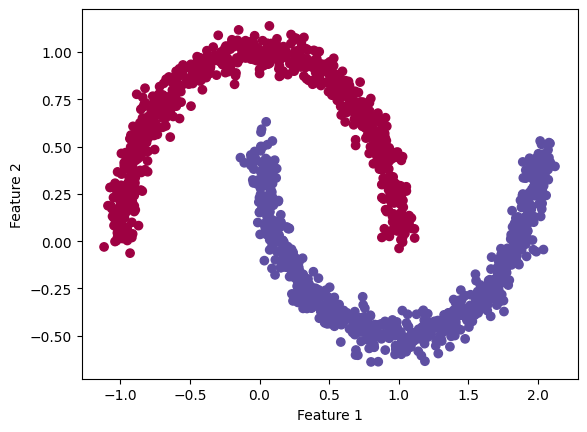

In [5]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x = df["x1"], y = df["x2"], c = df["label"], cmap =plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


In [6]:
# Turn data into tensors of dtype float

X = torch.from_numpy(X).type(dtype = torch.float).to(device)
y = torch.from_numpy(y).type(dtype = torch.float).to(device).unsqueeze(1)
print(X.shape, y.shape)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

torch.Size([1500, 2]) torch.Size([1500, 1])


In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([1200, 2]),
 torch.Size([300, 2]),
 torch.Size([1200, 1]),
 torch.Size([300, 1]))

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [8]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class BinaryClassification(nn.Module):

    def __init__(self):
      super().__init__()

      self.linear_layer_stack = nn.Sequential(
          nn.Linear(in_features = 2, out_features =5),#
          nn.ReLU(),
          nn.Linear(in_features = 5, out_features = 5),
          nn.ReLU(),
          nn.Linear(in_features = 5, out_features = 1)
      )


    def forward(self, x):
        return self.linear_layer_stack(x)

# Instantiate the model

model = BinaryClassification().to(device)

model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.2444,  0.4909],
                      [-0.1856, -0.0225],
                      [ 0.2928,  0.4443],
                      [ 0.6492, -0.1688],
                      [-0.5256, -0.1533]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([-0.2182,  0.2214, -0.6309, -0.6517, -0.5224], device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.1655,  0.3350,  0.3264,  0.3951, -0.3249],
                      [ 0.4022,  0.1238, -0.3189, -0.1919, -0.1378],
                      [ 0.3133,  0.2000,  0.0526, -0.2893, -0.3240],
                      [-0.2246,  0.0270,  0.3113,  0.4128, -0.2609],
                      [ 0.3585, -0.1704,  0.0111, -0.0354,  0.0606]], device='cuda:0')),
             ('linear_layer_stack.2.bias',
              tensor([-0.4158,  0.3998, -0.3821, -0.2900,  0.1724], device='cuda:0')),
             ('linear_layer_stack.4.weight',
          

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [9]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params = model.parameters(), lr =0.2)

# Setup Metric accuracy

from torchmetrics  import Accuracy

acc_fn = Accuracy(task = "multiclass", num_classes = 2).to(device)


## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [10]:
# Training loop

def trainer(model, epochs, x_train, x_test, y_train, y_test):

  # Moving models to device
  model = model.to(device)
  x_train = x_train.to(device)
  x_test = x_test.to(device)
  y_train = y_train.to(device)
  y_test = y_test.to(device)

  # Loggers
  epoch_count = []
  train_loss = []
  test_loss =[]
  train_acc = []
  test_acc = []

  for epoch in range(epochs):

    # Train mode
    model.train()

    # Forward
    y_logits = model(x_train)

    ##  logits to y_pred
    y_pred = torch.round(torch.sigmoid(y_logits))
    ## train_accuracy
    acc_train = acc_fn(y_pred, y_train)

    # Calculate Loss
    loss_train = loss_fn(y_logits, y_train)

    # Reset optimizer
    optimizer.zero_grad()

    # Loss backward
    loss_train.backward()

    # Optimizer step
    optimizer.step()

    # Evaluation

    if epoch % 10 == 0:

      # Eval mode
      model.eval()

      with torch.inference_mode():

        # y_logits for test data

        y_logits = model(x_test)

        ## logits to y_pred
        y_pred = torch.round(torch.sigmoid(y_logits))

        ## Calculate accuracy
        acc_test = acc_fn(y_pred, y_test)

        # Calculate loss
        loss_test = loss_fn(y_pred, y_test)

        # Logging
        epoch_count.append(epoch)
        train_loss.append(loss_train.item())
        test_loss.append(loss_test.item())
        train_acc.append(acc_train.cpu())
        test_acc.append(acc_test.cpu())


  return {"epochs":epoch_count, "train_loss": train_loss, "test_loss":test_loss, "train_acc":train_acc, "test_acc":test_acc, "model": model}


In [11]:
# Train for epochs = 1000

logs = trainer(model = model, epochs = 2500, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [12]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [13]:
# Plot the loss and accuracy

def plot_logs(logs):

  plt.plot(logs["epochs"], logs["train_loss"], "g+", label = "Train-loss")
  plt.plot(logs["epochs"], logs["test_loss"], "r+", label = "Test-loss")
  plt.plot(logs["epochs"], logs["train_acc"], "g--", label = "Train-acc")
  plt.plot(logs["epochs"], logs["test_acc"], "r--", label = "Test-acc")
  plt.xlabel("Epochs")
  plt.ylabel("Metrics")
  plt.title("Model performance")
  plt.legend(prop = {"size": 8})


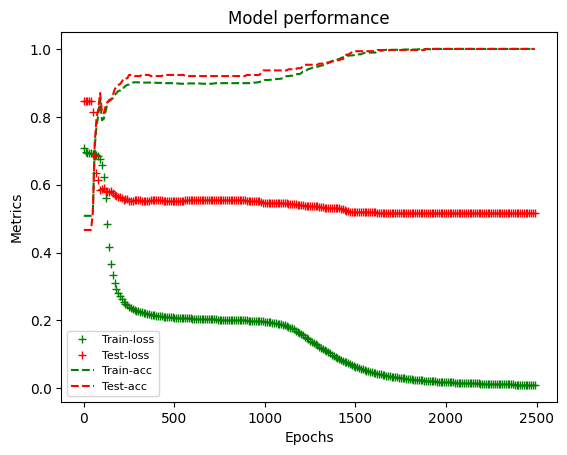

In [14]:
# Plot decision boundaries for training and test sets

plot_logs(logs)


Text(0.5, 1.0, 'Test')

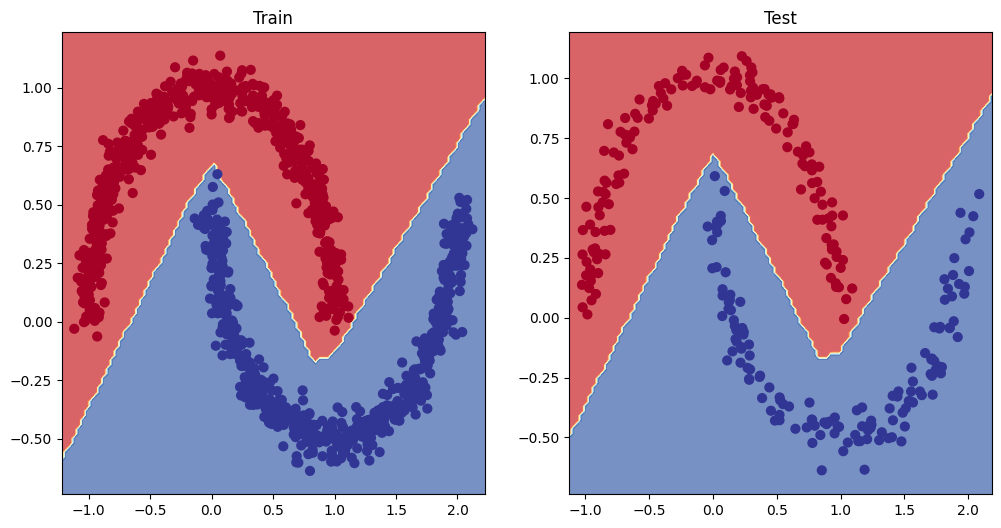

In [15]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model = logs["model"], X = x_train, y= y_train)
plt.title("Train")

plt.subplot(1,2,2)
plot_decision_boundary(model = logs["model"], X =x_test, y =y_test)
plt.title("Test")

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [16]:
# New activation function

class BinaryClassificationT(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 5),
        nn.Tanh(),
        nn.Linear(in_features = 5, out_features = 5),
        nn.Tanh(),
        nn.Linear(in_features = 5, out_features = 1)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [17]:
model_1 = BinaryClassificationT().to(device)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.2)

In [18]:
# Epochs = 1000

logs = trainer(model_1, 2000, x_train, x_test, y_train, y_test)



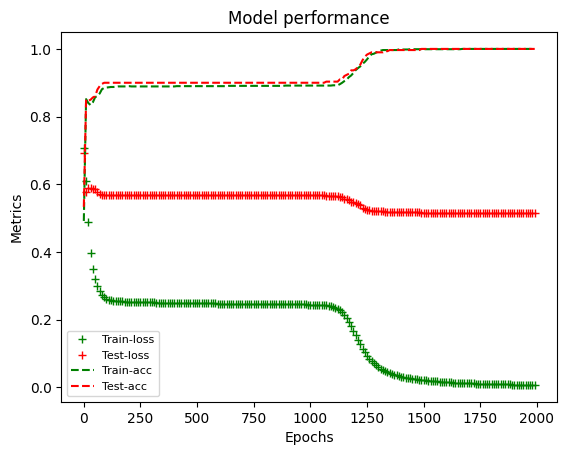

In [19]:
plot_logs(logs)


Text(0.5, 1.0, 'Test')

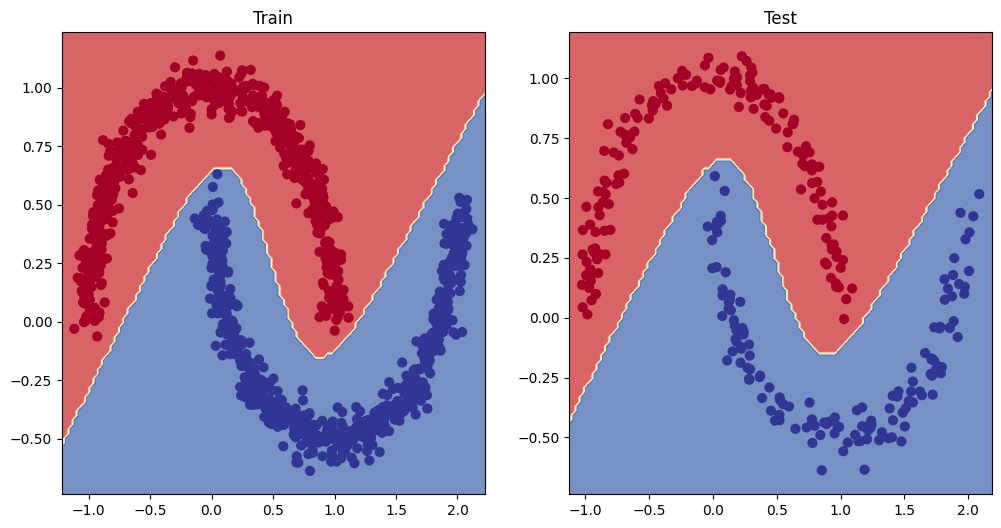

In [20]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model = logs["model"], X =  x_train, y = y_train)
plt.title("Train")

plt.subplot(1,2,2)
plot_decision_boundary(model = logs["model"], X =x_test, y = y_test)
plt.title("Test")

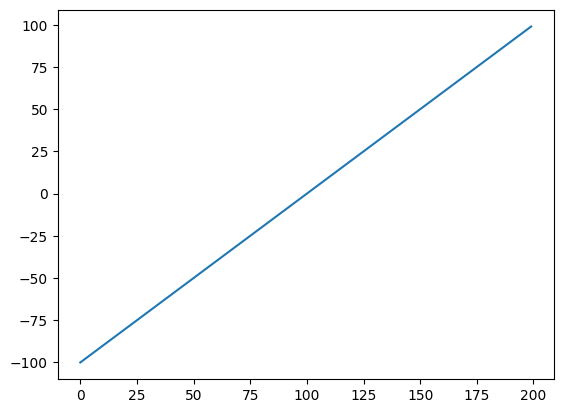

In [21]:
# Create a straight line tensor
tensor_a = torch.arange(-100,100,1)
plt.plot(tensor_a)

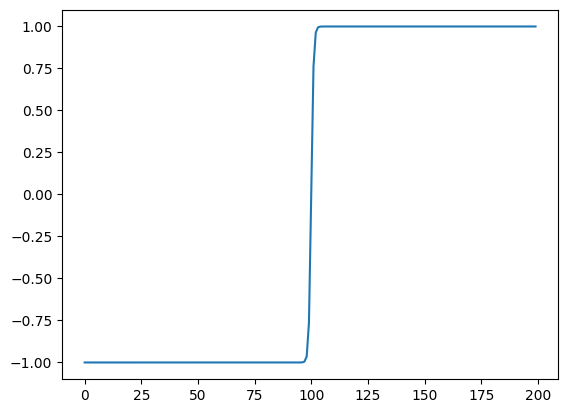

In [22]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(tensor_a))

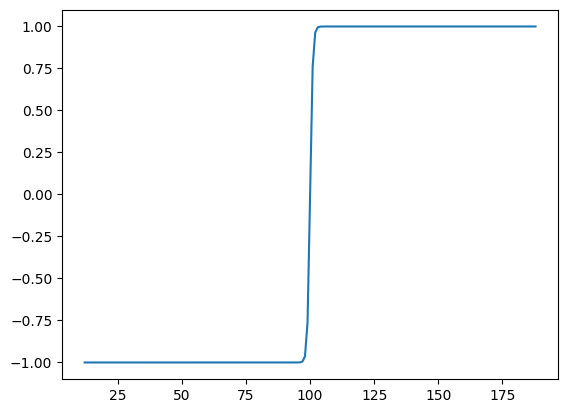

In [23]:
# Replicate torch.tanh() and plot it

def tanh(x):

  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))


plt.plot(tanh(tensor_a))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

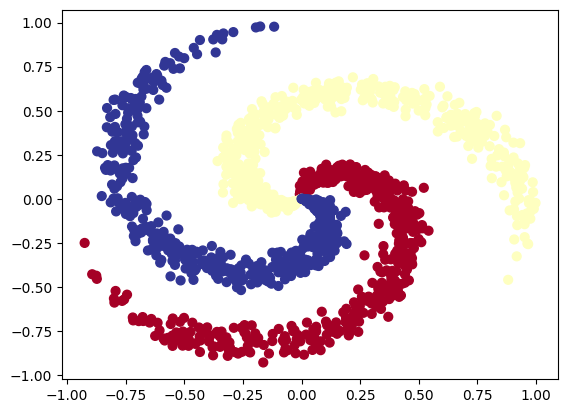

In [34]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [35]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float).to(device) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor).to(device) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X.cpu(), y.cpu(), test_size = 0.20, random_state = 42)


x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([1200, 2]),
 torch.Size([300, 2]),
 torch.Size([1200]),
 torch.Size([300]))

In [36]:
x_train[0]

tensor([ 0.3699, -0.6703])

In [37]:
y_train.unique()

tensor([0, 1, 2])

In [38]:
# Model building

class MulticlassClassification(nn.Module):

  def __init__(self):

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 3)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [39]:
model_1 = MulticlassClassification().to(device)

model_1.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.6879,  0.3492],
                      [-0.2267, -0.1152],
                      [-0.2663, -0.4187],
                      [ 0.4396, -0.3025],
                      [-0.0658,  0.6307],
                      [ 0.5625, -0.1270],
                      [ 0.4769, -0.0185],
                      [-0.0856, -0.3853],
                      [-0.6766, -0.3974],
                      [-0.3708,  0.3598]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.0666, -0.6111, -0.0333,  0.1427, -0.0027,  0.3378,  0.2392, -0.6125,
                      -0.2239, -0.1927], device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.2664, -0.1384,  0.0331, -0.2752,  0.0387,  0.2361,  0.2384, -0.1078,
                        0.2307,  0.0499],
                      [-0.2710, -0.2272,  0.0518, -0.0039, -0.2630,  0.0974, -0.2428, -0.2017,
                       -0.3095,  0.0402],

In [40]:
# Loss functions and optimizers

loss_fn = nn.CrossEntropyLoss()

# Optimizers

optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.02 )

# Metric
from torchmetrics import Accuracy

acc_fn = Accuracy(task = "multiclass", num_classes = 3)

acc_fn.to(device)

MulticlassAccuracy()

In [41]:
# Training loop

def trainer(model, epochs, x_train, x_test, y_train, y_test):

  # Model to device
  model = model.to(device)
  x_train = x_train.to(device)
  x_test = x_test.to(device)
  y_train = y_train.to(device)
  y_test = y_test.to(device)


  # Logger
  epoch_count = []
  train_loss = []
  test_loss = []
  train_acc = []
  test_acc = []

  for epoch in range(epochs):

    # Train mode
    model.train()

    # Forward
    y_logits = model(x_train)

    ## y_logits to y_predic
    y_pred = torch.softmax(y_logits, dim =1).argmax(dim =1)

    acc_train = acc_fn(y_pred, y_train)

    # Calculate loss
    loss_train = loss_fn(y_logits, y_train)

    # Reset optimizer
    optimizer.zero_grad()

    # Loss backward
    loss_train.backward()

    # Optimizer step
    optimizer.step()

    if epoch % 10 == 0:

      # Eval mode
      model.eval()

      with torch.inference_mode():

        y_logits = model(x_test)

        ## y_logits to y_pred
        y_pred = torch.softmax(y_logits, dim =1).argmax(dim =1)
        ## Accuracy
        acc_test = acc_fn(y_pred, y_test)

        # Calculate test loss
        loss_test = loss_fn(y_logits, y_test)

        # Logging
        epoch_count.append(epoch)
        train_loss.append(loss_train.item())
        test_loss.append(loss_test.item())
        train_acc.append(acc_train.cpu())
        test_acc.append(acc_test.cpu())

  return {"epochs": epoch_count, "test_loss": test_loss, "train_loss": train_loss, "train_acc":train_acc, "test_acc":test_acc, "model":model}



In [42]:
# train for 1500 epochs

logs = trainer(model_1, 1500, x_train, x_test, y_train, y_test)

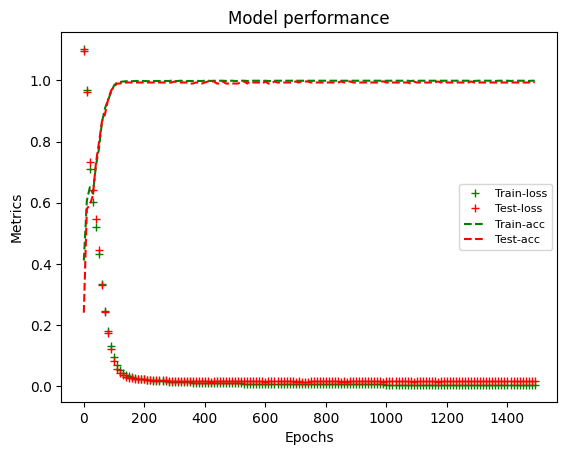

In [43]:
plot_logs(logs)

Text(0.5, 1.0, 'Test')

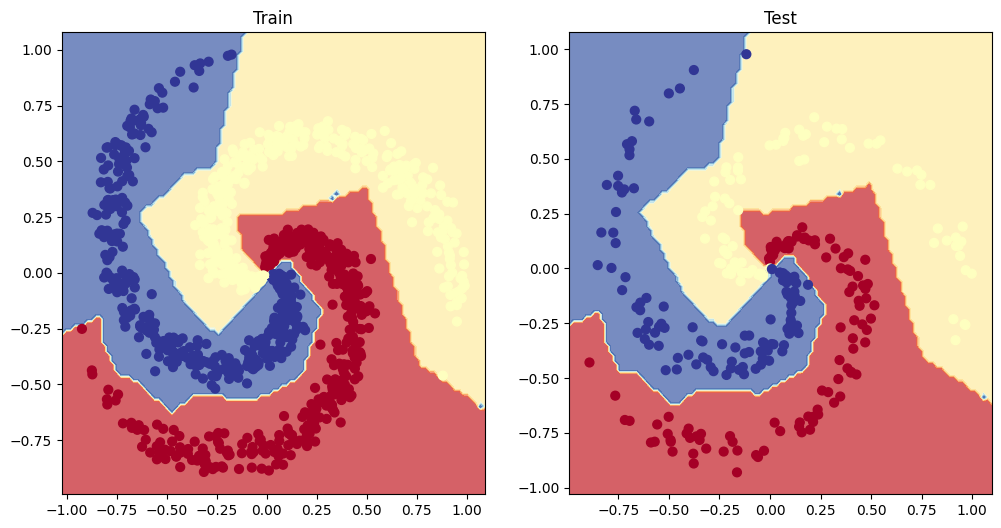

In [44]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_1, x_train, y_train)
plt.title("Train")

plt.subplot(1,2,2)
plot_decision_boundary(model_1, x_test, y_test)
plt.title("Test")